# Variability VS frequency with the SAME fire

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

%matplotlib notebook

exec(open("ode2.py").read(), globals())

## Reference

In [3]:
Freq_v = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 2., 2.5, 3.]
M_v = [0.8, 0.9, 1., 1.05, 1.1]
#nParall = len(M)

In [4]:
a = 0.2
m_ref = M_v[0]
Param_phy = [a, m_ref]
Init = [0, Param_phy[1]]

      
Init = [1., .5]


freq_ref = Freq_v[0]
Param_freq = {"p":  freq_ref}#2
dt = min([0.1, 0.1/Param_freq["p"]]) ### Use small $dt$ (it could increase when we change the frequency) CHANGED
dt_ref = dt
finalTime = 500
finalTime_ref = finalTime

Param_strength = {"scale":0.01} # 0.0008
Param_coupled = {"alpha":5., # 20
                 "beta":1.}# 500


Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}

<Figure size 1296x432 with 0 Axes>

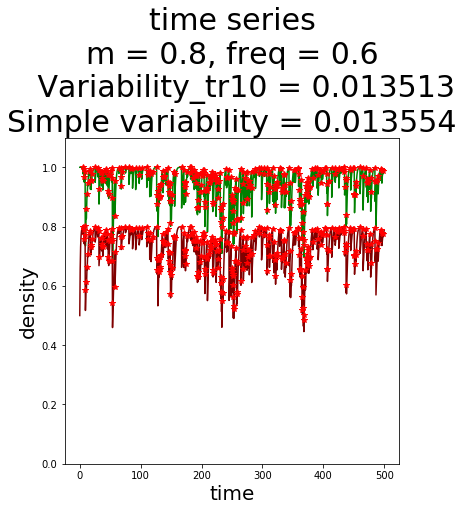

In [5]:
#Fire_events = np.zeros((nParall, 1000), dtype="bool")
#Fire_strength = np.zeros((nParall, 1000))

plt.figure(figsize = (18, 6))
O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt_ref, Fire_param = Fire_param)
nbreIter_ref = O.NbreIte
Fire_events = O.Fire_events
Fire_strength = O.Fire_strength
O.solve_by_part()
var = O.variability("N+W")
var_a = np.var(O.N+O.W)
#plt.figure(figsize = (12, 6))
#plt.subplot(1, nParall, j+1)
plt.figure(figsize = (6, 6))
O.plot_time_series(generation=False, show=False, legend = False)
plt.title("time series\nm = "+str(m_ref)+", freq = "+str(freq_ref)+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 30)
plt.show()

#### Etirements de l'array Fire Fire_events[j, :] et Fire_strength[j]

In [6]:
def same(M, Freq, show=True):
    nParall = len(M)
    Var = np.zeros((len(Freq), nParall))
    Var_a = np.zeros((len(Freq), nParall))
    for i, freq in enumerate(Freq):
        ratio = round(freq/freq_ref, 4)
        #dt = round(dt_ref/ratio, 3)
        dt = dt_ref/ratio
        #finalTime  = round(finalTime_ref / ratio, 3)
        finalTime = finalTime_ref / ratio

        # Faire un dt plus inteligent pour eviter qu'il devienne trop grand
        #if(freq < freq_ref): #étirer
       # elif(freq > freq_ref):
        #    pass
        #else:
      #      dt = dt_ref

        #print("m = "+str(m))
        
        if(show):
            plt.figure(figsize = (30, 6))
        for j in range(nParall):
            Param_phy[1] = M[j]
            Init[1] = Param_phy[1]
            O = Ode(model = "allee_effect_adi", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
            if(ratio > 1 ):
                O.Fire_events[:nbreIter_ref]  = Fire_events[:len(O.Fire_events)]
                O.Fire_strength[:nbreIter_ref] = Fire_strength[:len(O.Fire_strength)]

            elif(ratio < 1):
                O.Fire_events  = Fire_events[:len(O.Fire_events)]
                O.Fire_strength = Fire_strength[:len(O.Fire_strength)]
            else:
                O.Fire_events = Fire_events
                O.Fire_strength = Fire_strength  
            O.solve_by_part()
            var = O.variability("N+W")
            var_a = np.var(O.N+O.W)
            Var[i,j] = var
            Var_a[i,j] = var_a
            if(show):
                plt.subplot(1, nParall, j+1)
                O.plot_time_series(generation=False, show=False, legend = False)
                plt.xlim(-2, 1.05*finalTime_ref)
                plt.title("time series\nm = "+str(M[j])+", freq = "+str(Freq[i])+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 21)
#        O.plot_time_series()
        if(show):
            plt.show()
    return Var, Var_a

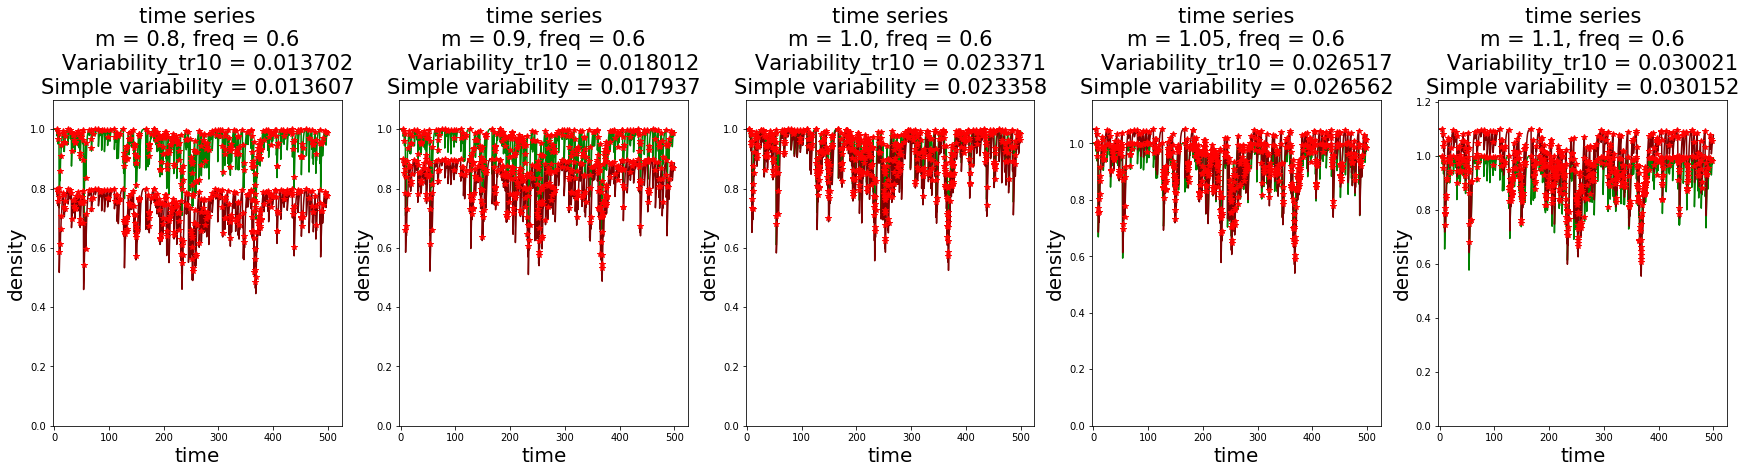

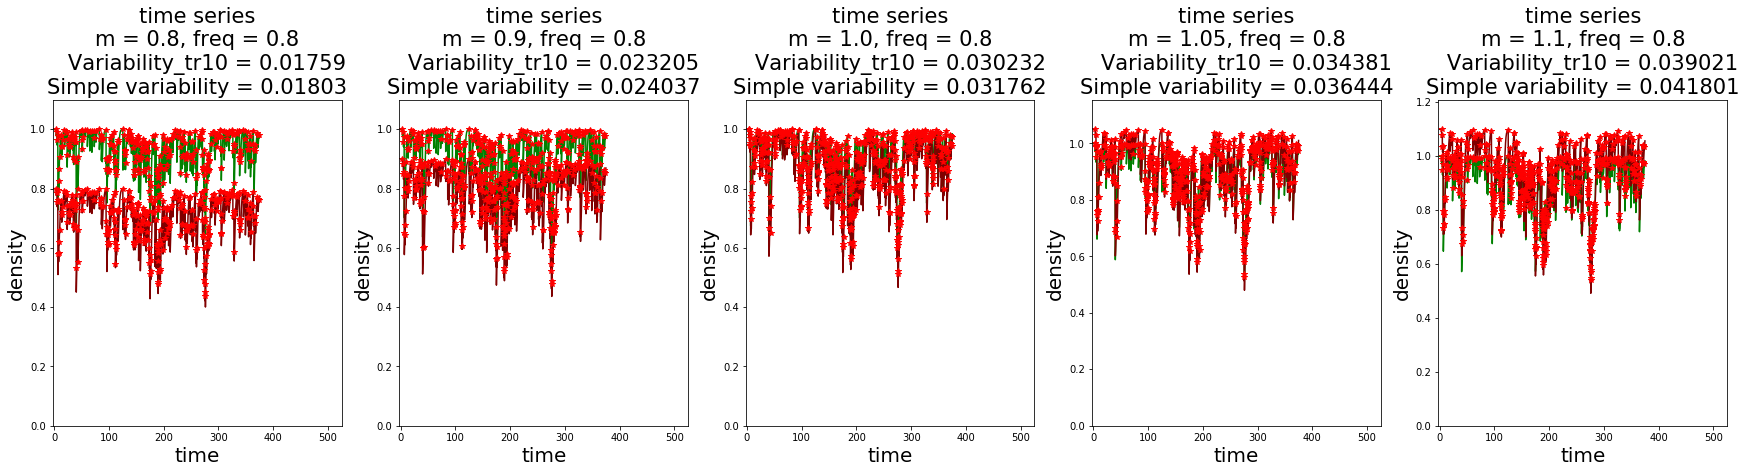

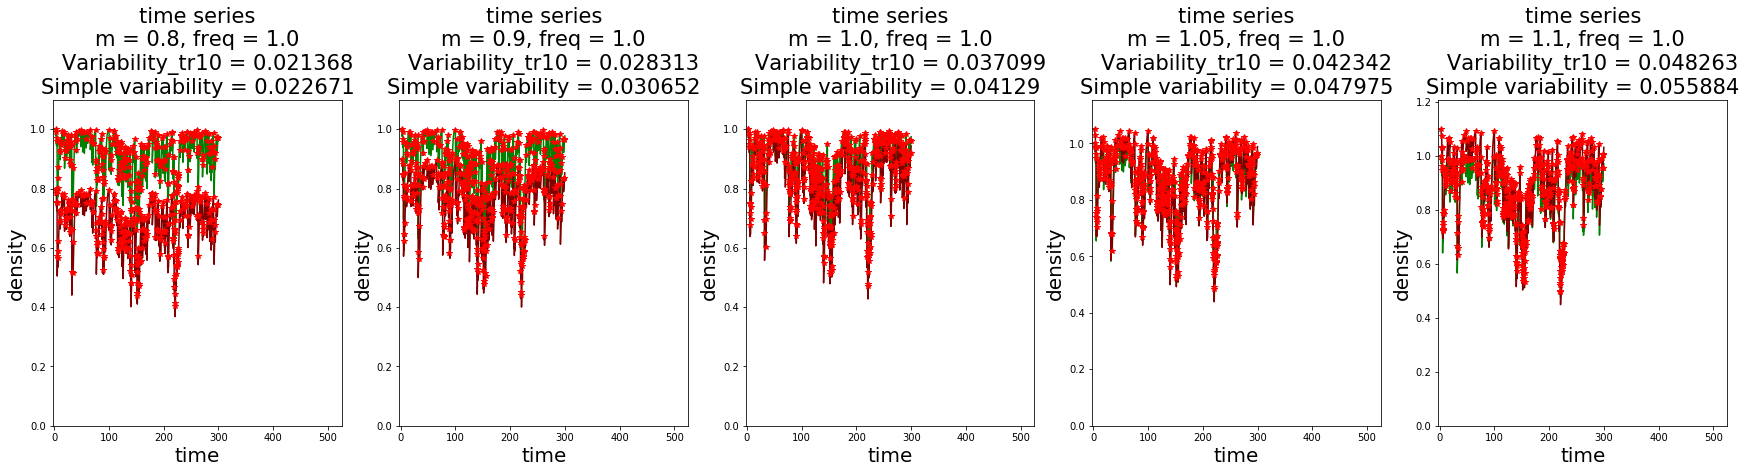

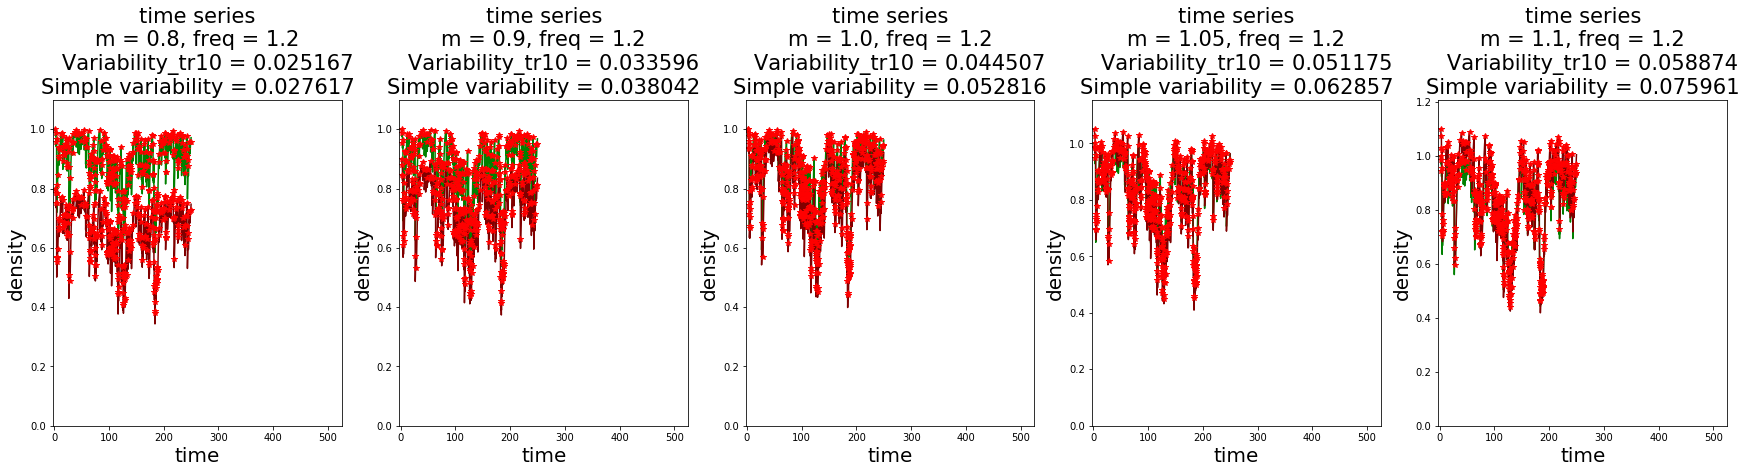

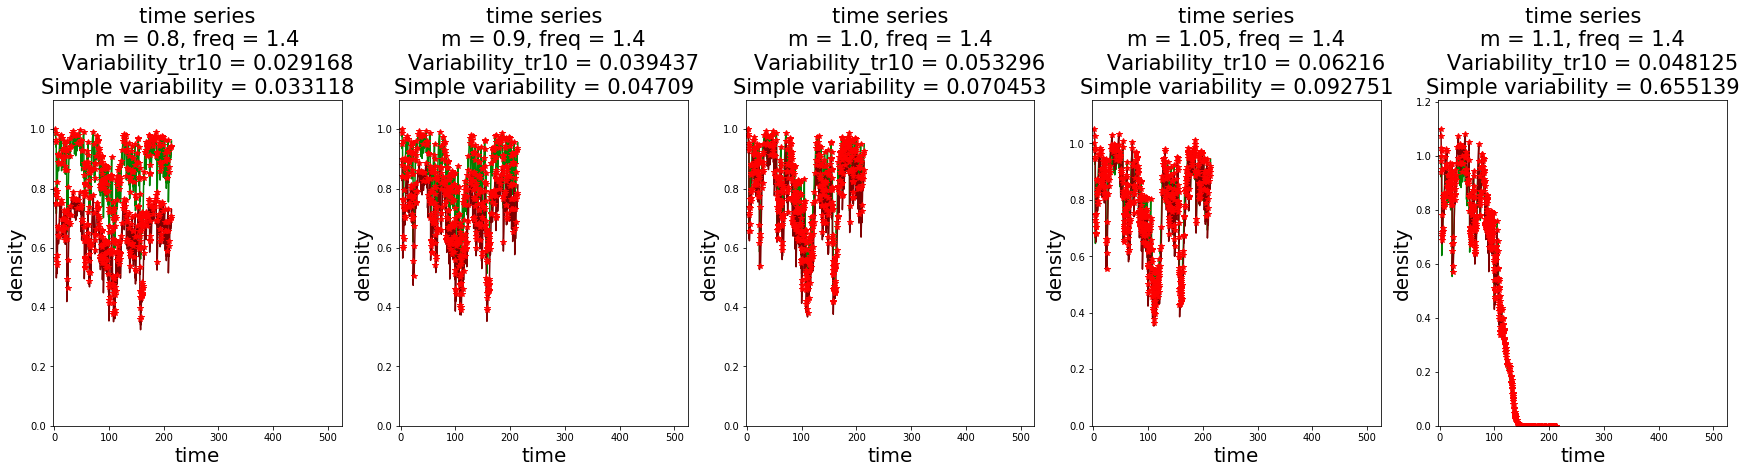

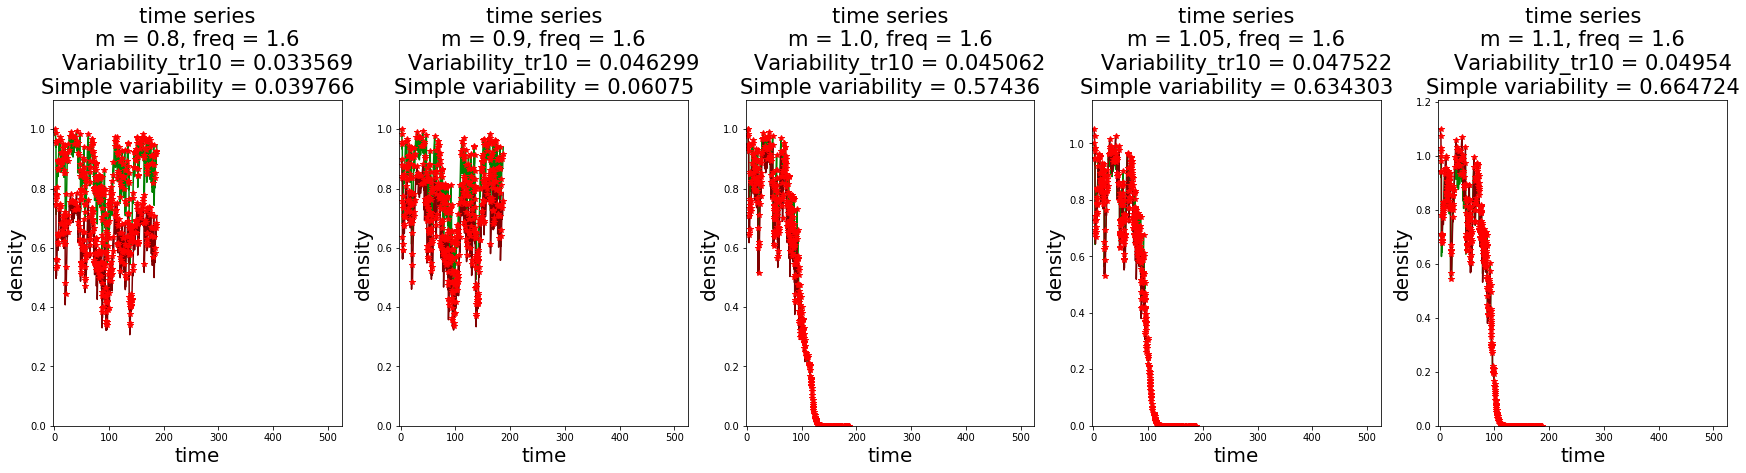

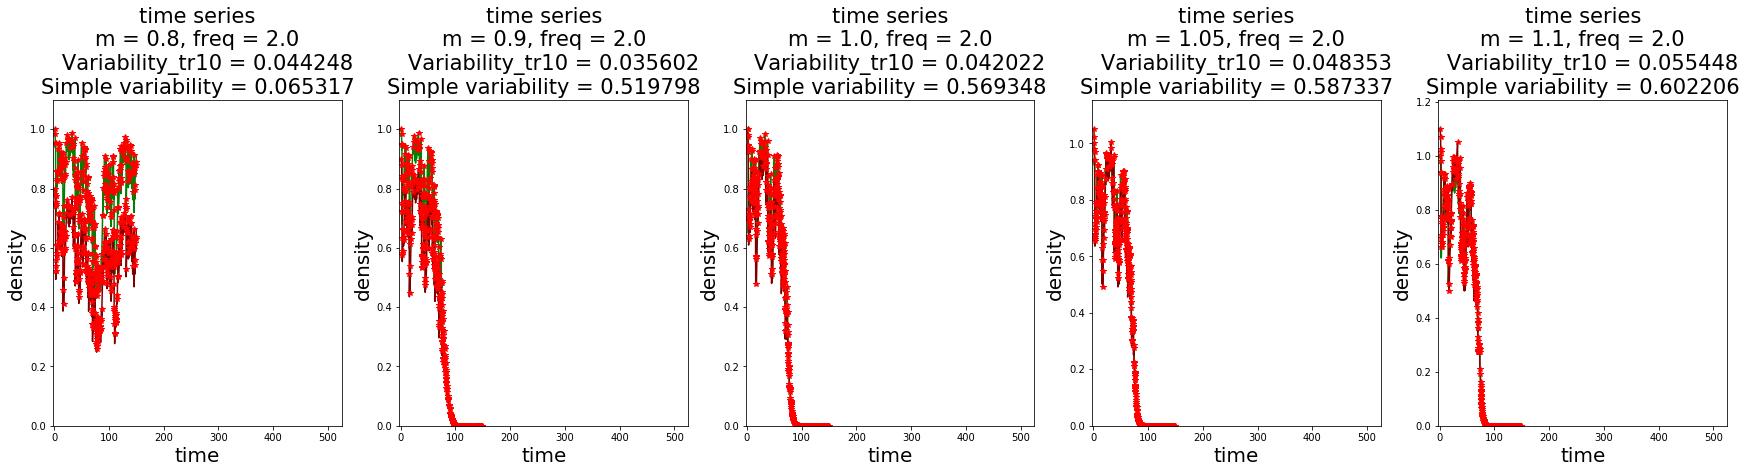

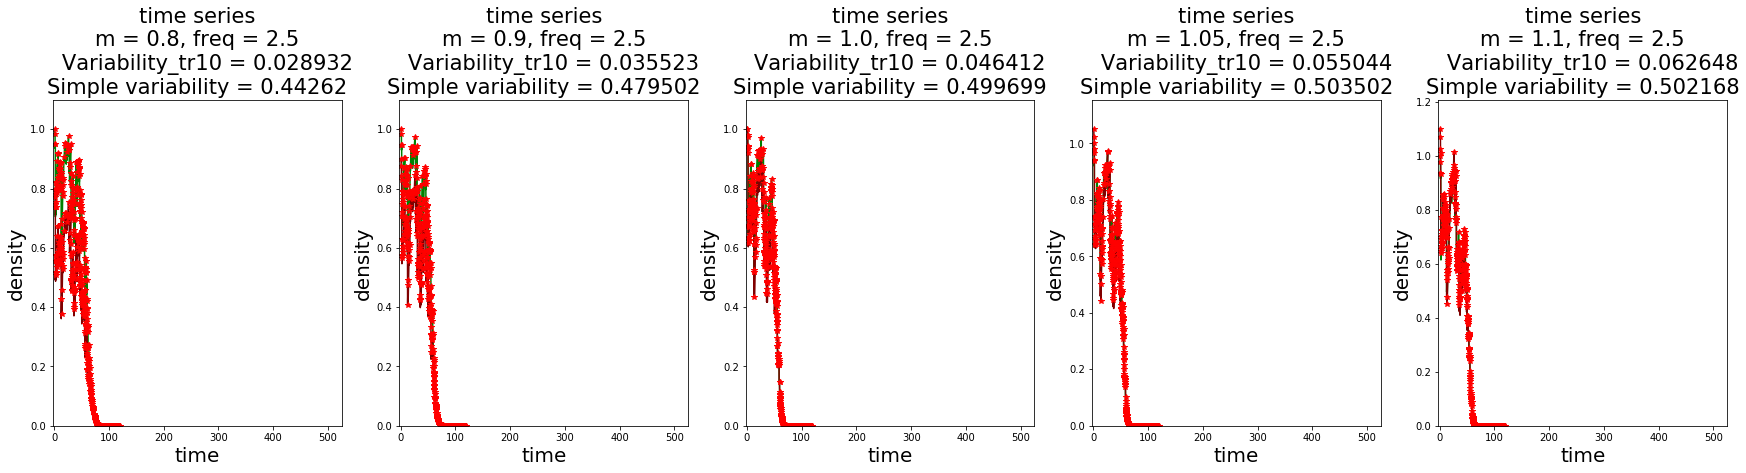

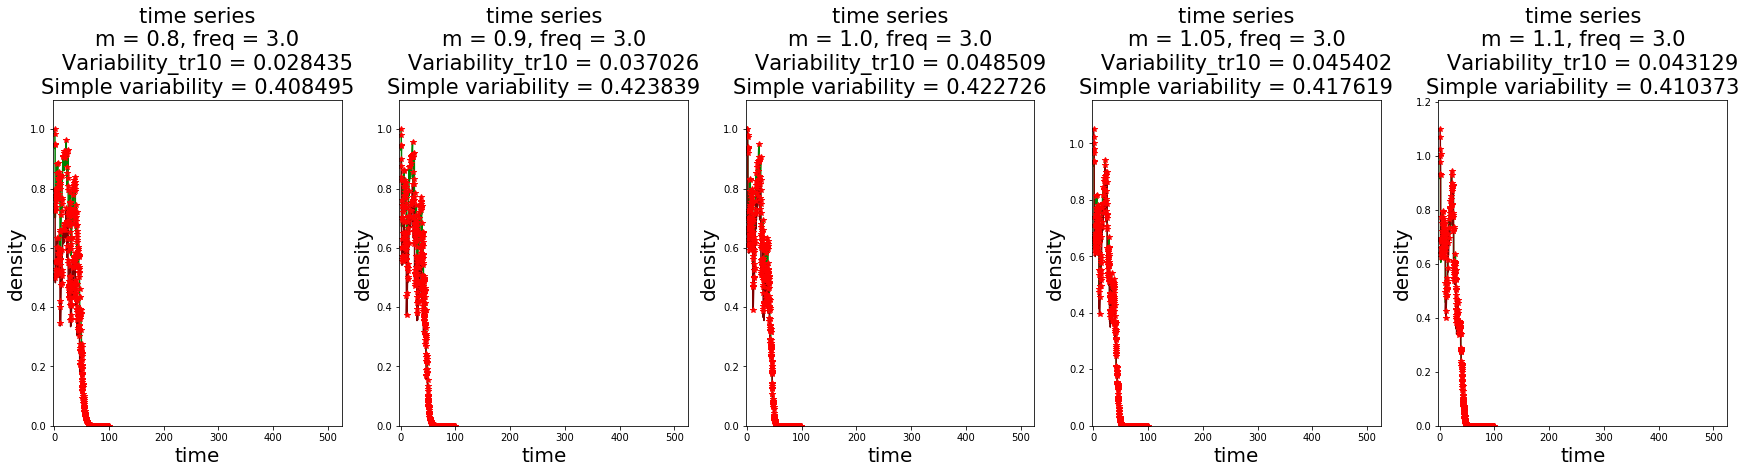

In [7]:
Var, Var_a = same(M_v, Freq_v, show=True)

In [8]:
Freq_c = [0.4, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.35, 1.4, 1.5, 1.55, 1.6, 1.7, 1.72, 1.73, 1.74, 1.76, 1.78, 1.8, 1.85, 1.9, 1.95, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.7, 3., 4., 6.]
# less point should be enough
M_c = [0.8, 0.9, 1., 1.05, 1.1]
Var, Var_a = same(M_c, Freq_c, show = False)

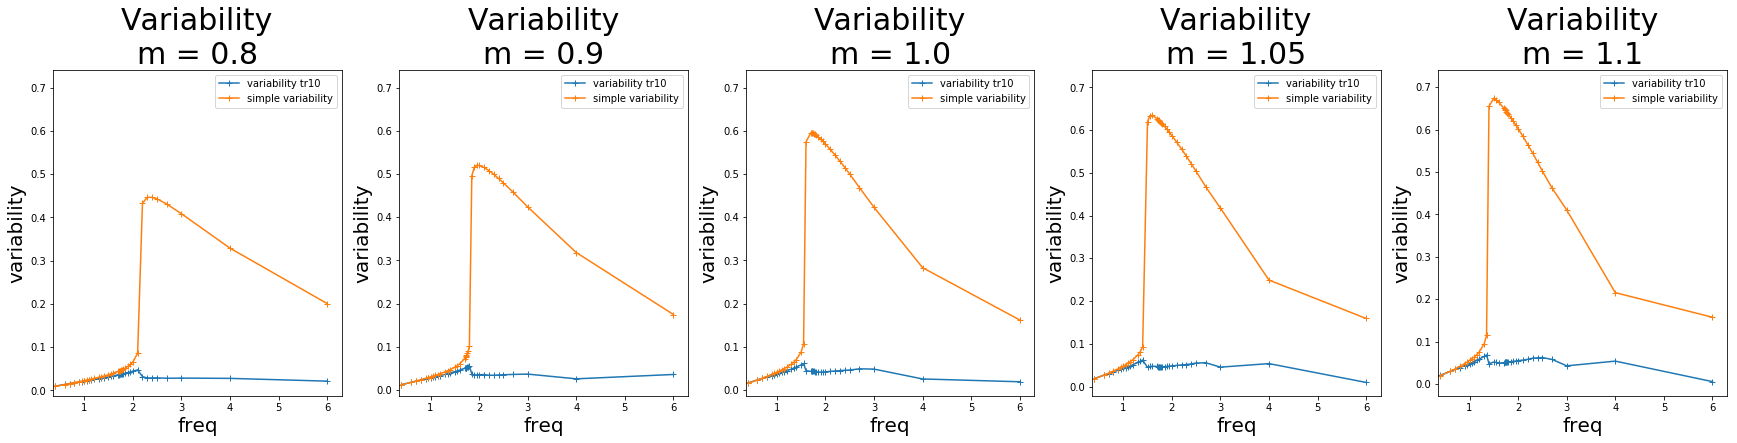

In [9]:
plt.figure(figsize = (30, 6))
mmax_tr10 = np.nanmax(np.nanmax(Var))
mmax_a = np.nanmax(np.nanmax(Var_a))
mmax = max([mmax_tr10, mmax_a])

for j,m in enumerate(M_c):
    plt.subplot(1, len(M_c), j+1)
    plt.plot(Freq_c, Var[:,j], "+-", label="variability tr10")
    plt.plot(Freq_c, Var_a[:,j], "+-", label="simple variability")
    plt.legend()
    plt.title("Variability\nm = "+str(M_c[j]), fontsize = 30)
    plt.xlabel("freq", fontsize = 20)
    plt.ylabel("variability", fontsize = 20)
    plt.ylim(top = 1.1*mmax)
    plt.xlim(0.9*Freq_c[0], 1.05*Freq_c[-1])
plt.show()

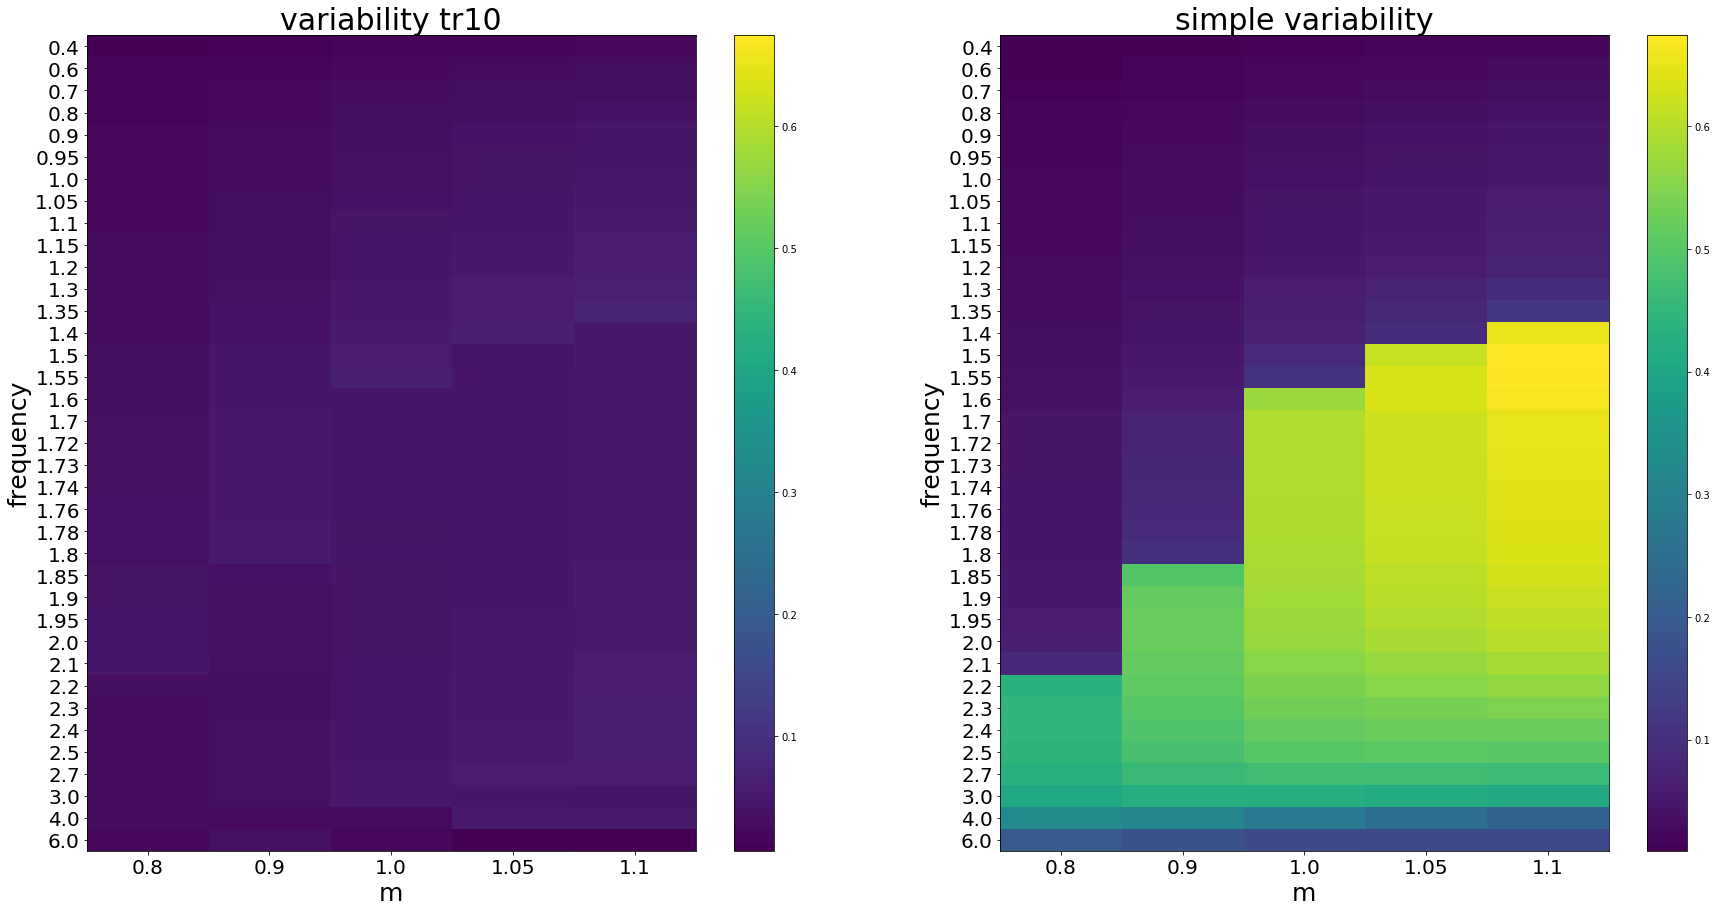

In [10]:
plt.subplots(figsize=(30, 15))

plt.subplot(1,2,1)
plt.title("variability tr10", fontsize = 30)
plt.imshow(Var, vmax=mmax, aspect="auto")
plt.xticks(np.arange(len(M_c)), M_c, fontsize=20)
plt.xlabel("m", fontsize=25)
plt.yticks(np.arange(len(Freq_c)), Freq_c, fontsize=20)
plt.ylabel("frequency", fontsize=25)
plt.colorbar()

plt.subplot(1,2,2)
plt.title("simple variability", fontsize = 30)
plt.imshow(Var_a, vmax=mmax, aspect="auto")
plt.xticks(np.arange(len(M_c)), M_c, fontsize=20)
plt.xlabel("m", fontsize=25)
plt.yticks(np.arange(len(Freq_c)), Freq_c, fontsize=20)
plt.ylabel("frequency", fontsize=25)
plt.colorbar()

plt.show()